Topic Modeling approach : Unsupervised technique to find topic in corpus.

Applications :- 
1.	Documentation Categorizations
2.	Document Summerizations
3.	Dimensionality reductions
4.	Informational Retrieval
5.	Recomendations engines

Topic Modelling Approaches:-

1.	LDA - Latent Dirichlet
2.	NNMF - Non Negative Matrix Factorization
3.	LSA - Latent Semantic Allocation

LDA two most important work are :

1.	What are most important topics 
2.	What are the Topic assigned to every documents.

Also known as 	

1.	What is topics to term distribution
2.	What is documents to topics distribution

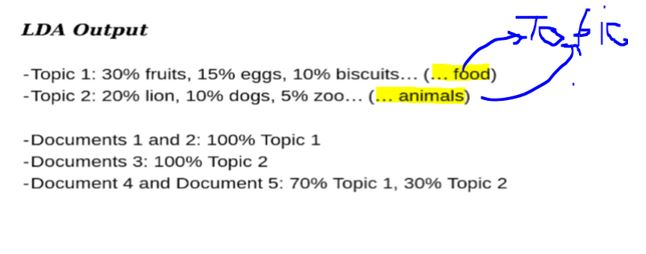

**Statistical LDA Assumptions :**  

Document = mixtures of topics</br>
Topics = mix ture sof words

Documents : Probability of Distributions of Topics</br>
Topics : Proability Distributions of Words

Document word matrix = Document Topic Matrix + Topic Word Matrix

Goal is optimize both Matric

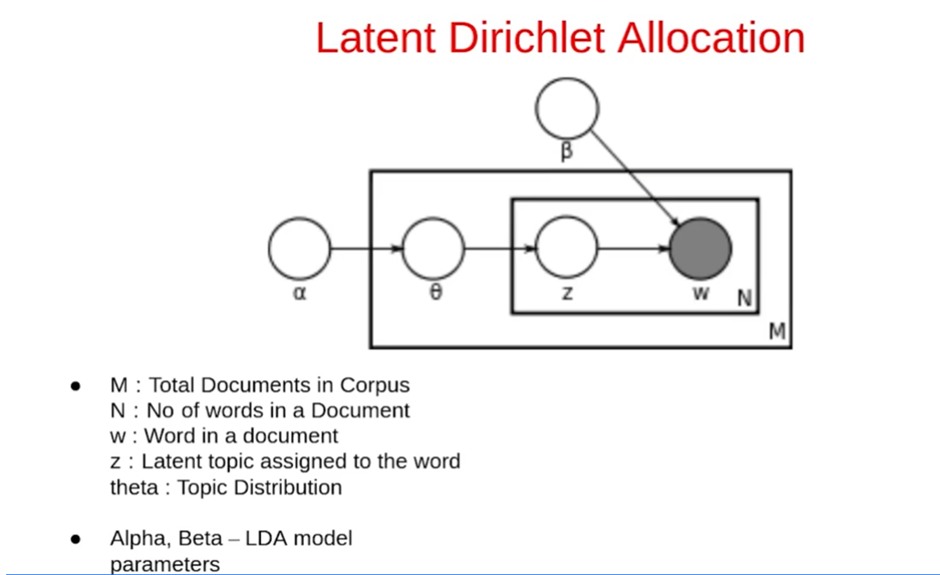

In [92]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

cv = CountVectorizer()

In [93]:
corpus = ["i love cooking", "I have prepared a cake today", "he is going to a new place", "he will learn cooking there"]

In [94]:
cvz = cv.fit_transform(corpus)

In [95]:
vocab = cv.get_feature_names_out()
vocab

array(['cake', 'cooking', 'going', 'have', 'he', 'is', 'learn', 'love',
       'new', 'place', 'prepared', 'there', 'to', 'today', 'will'],
      dtype=object)

In [96]:
lda = LatentDirichletAllocation(n_components=3, max_iter = 20, random_state=20)
X_topics = lda.fit_transform(cvz)
topic_words = lda.components_
topic_words

array([[0.33409872, 1.3520179 , 0.33426983, 0.33409872, 0.3344864 ,
        0.33426983, 0.33484162, 1.33184251, 0.33426983, 0.33426983,
        0.33409872, 0.33484162, 0.33426983, 0.33409872, 0.33484162],
       [1.33225166, 0.33510505, 0.33404224, 1.33225166, 0.33407486,
        0.33404224, 0.33419528, 0.33426477, 0.33404224, 0.33404224,
        1.33225166, 0.33419528, 0.33404224, 1.33225166, 0.33419528],
       [0.33364962, 1.31287705, 1.33168793, 0.33364962, 2.33143874,
        1.33168793, 1.33096309, 0.33389272, 1.33168793, 1.33168793,
        0.33364962, 1.33096309, 1.33168793, 0.33364962, 1.33096309]])

In [97]:
n_top_words = 4 

for i, topic_dist in enumerate(topic_words):
    sorted_topic_dist = np.argsort(topic_dist)
    topic_words = np.array(vocab)[sorted_topic_dist]
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['cooking' 'love' 'will']
Topic 2 ['today' 'prepared' 'have']
Topic 3 ['he' 'to' 'place']


In [98]:
x = np.array([3, 1, 2])
np.argsort(x)

array([1, 2, 0])

In [99]:
doc_topic  =  lda.fit_transform(cvz)

for n in range(doc_topic.shape[0]):
  topic_doc  = doc_topic[n].argmax()
  print("Document ", n+1, "--Topic:", topic_doc)

Document  1 --Topic: 0
Document  2 --Topic: 1
Document  3 --Topic: 2
Document  4 --Topic: 2
